In [1]:
from model import *

In [40]:
economy = Economy(seed=1000)

Running: assign_firms
Counter: 1000
Running: initialize_reservation
Counter: 1000
Running: initialize_money
Counter: 1000
Running: initialize_price_wage
Counter: 100


In [43]:
years = 1
days = 21*12*years # 21 * 12 steps = 1 year
print(f"Running model for {days} days.")
for _ in range(days): 
    economy.step()    

Running model for 252 days.
Today is day 1.
start of month.
Running: update_employment_hist
Counter: 1000
Running: set_wage
Counter: 100
Running: unemployed_search
Counter: 1000
Running: employed_search
Counter: 0
Running: budget
Counter: 1000
Running: reset_monthly_stats
Counter: 100
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 2.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 3.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 4.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 5.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 6.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 7.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 8.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 9.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is day 10.
Running: buy
Counter: 1000
Running: produce
Counter: 99
Today is 

In [6]:
hdata = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Household)

In [7]:
print(hdata)

                employment
Step   AgentID            
21     1                 1
       2                 1
       3                 1
       4                 1
       5                 1
...                    ...
126000 996               1
       997               1
       998               1
       999               1
       1000              1

[6000000 rows x 1 columns]


In [8]:
type(hdata)

pandas.core.frame.DataFrame

In [27]:
hdata_sum = hdata.groupby('Step')['employment'].sum().reset_index()
max_steps = max(hdata_sum["Step"])
years = 50
steps_count = 21*12*years
hdata_sum = hdata_sum[hdata_sum['Step'] > max_steps - steps_count].reset_index()
hdata_sum['year'] = hdata_sum.index/12

In [10]:
hdata_sum

,index,Step,employment,year
0,5400,113421,990,0.000000
1,5401,113442,990,0.083333
2,5402,113463,992,0.166667
3,5403,113484,994,0.250000
4,5404,113505,991,0.333333
...,...,...,...,...
595,5995,125916,972,49.583333
596,5996,125937,976,49.666667
597,5997,125958,979,49.750000
598,5998,125979,983,49.833333


In [11]:
hdata_sum['employment']

0      990
1      990
2      992
3      994
4      991
      ... 
595    972
596    976
597    979
598    983
599    982
Name: employment, Length: 600, dtype: int64

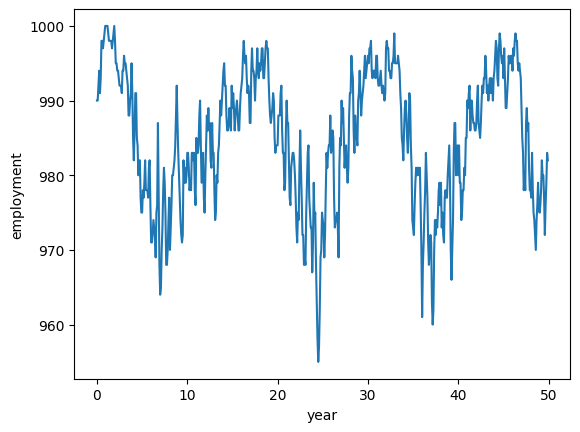

In [12]:
g = sns.lineplot(
    data=hdata_sum,
    x = 'year',
    y = 'employment'
    )

In [13]:
fdata = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Firm)

In [14]:
fdata

output       price  employees      demand  vacancy  \
Step   AgentID                                                       
21     1001          0    1.000000          0    0.000000      inf   
       1002        630    1.000000         10  600.000000      inf   
       1003        378    1.000000          6  360.000000      inf   
       1004        567    1.000000          9  540.000000      inf   
       1005        504    1.000000          8  480.000000      inf   
...                ...         ...        ...         ...      ...   
126000 1096        693  153.687568         11  693.000000      1.0   
       1097        378  153.513757          6  346.262511      0.0   
       1098         63  155.792778          1  107.405414      0.0   
       1099        693  150.482955         11  708.026503      0.0   
       1100        189  155.752416          3  201.787545      0.0   

                 inventory         wage  
Step   AgentID                           
21     1001       0.000000     5.808489  
       1002      30.000000    25.385807  
       1003      18.000000    27.936202  
       1004      27.000000    19.985422  
       1005      24.000000    15.203762  
...                    ...          ...  
126000 1096      33.000000  8210.479152  
       1097     324.983632  8871.603179  
       1098       3.000000  8581.073918  
       1099     154.484684  8479.274781  
       1100     304.411238  8416.702940  

[600000 rows x 7 columns]

In [37]:
fdata_sum = fdata.groupby('Step').mean().reset_index()
fdata_sum

,Step,output,price,employees,demand,vacancy,inventory,wage
0,21,630.00,1.000000,10.00,600.000000,inf,30.000000,19.014574
1,42,630.00,1.000000,10.00,630.000000,inf,30.000000,19.177165
2,63,630.00,1.000000,10.00,630.000000,inf,30.000000,19.368482
3,84,630.00,1.000000,10.00,630.000000,inf,30.000000,19.553344
4,105,630.00,1.000000,10.00,630.000000,inf,30.000000,19.721469
...,...,...,...,...,...,...,...,...
5995,125916,612.36,152.983970,9.72,615.369588,0.21,252.855398,8765.262811
5996,125937,614.88,153.012463,9.76,614.417064,0.23,253.318333,8739.688425
5997,125958,616.77,153.007982,9.79,613.689614,0.18,256.398719,8717.448609
5998,125979,619.29,153.008959,9.83,614.089677,0.26,261.599042,8702.239076


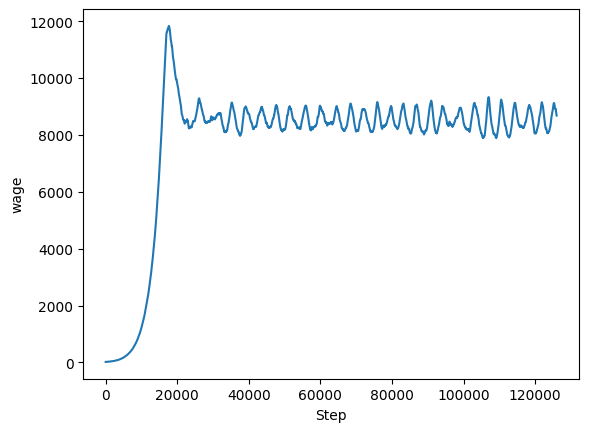

In [39]:
fdata_sum_filtered = fdata_sum[fdata_sum['Step'] > 0].reset_index()
g = sns.lineplot(
    data=fdata_sum_filtered,
    x = 'Step',
    y = 'wage'
    )

In [17]:
fdata_last = fdata.iloc[-1]
fdata_last

output        189.000000
price         155.752416
employees       3.000000
demand        201.787545
vacancy         0.000000
inventory     304.411238
wage         8416.702940
Name: (126000, 1100), dtype: float64

In [18]:
alldata = economy.datacollector.get_agent_vars_dataframe()
alldata

money
Step   AgentID              
21     1         9991.506985
       2         9835.735807
       3        10031.444136
       4        10058.206279
       5        10054.782514
...                      ...
126000 1096      9031.527068
       1097         0.000000
       1098       858.107392
       1099      9327.202259
       1100      2525.010882

[6600000 rows x 1 columns]

In [19]:
alldata_sum = alldata.groupby('Step').sum().reset_index()
alldata_sum['money'] = round(alldata_sum['money'], 0)
alldata_sum

,Step,money
0,21,10000000.0
1,42,10000000.0
2,63,10000000.0
3,84,10000000.0
4,105,10000000.0
...,...,...
5995,125916,10000000.0
5996,125937,10000000.0
5997,125958,10000000.0
5998,125979,10000000.0


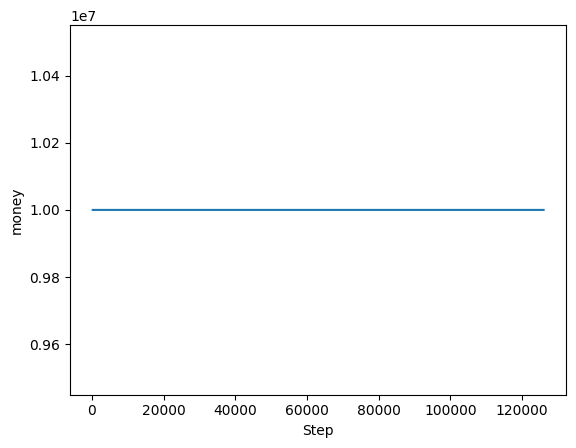

In [20]:
alldata_sum = alldata_sum[alldata_sum['Step'] > 10*21].reset_index()
g = sns.lineplot(
    data=alldata_sum,
    x = 'Step',
    y = 'money'
    )